> # **CAPSTONE PROJECT MODULE 3**

**SECTION**:
<BR> [1. DATA UNDERSTANDING](#1-data-understanding)
<BR> [2. DATABASE](#2-database)
<BR> [3. EXPLORATORY DATA ANALYSIS (EDA)](#3-exploratory-data-analysis)
<BR> [4. DATA PROCESSING](#4-data-processing)
<BR> [5. CONCLUSION](#5-conclusion)
<BR> [6. RECOMMENDATION](#6-recommendation)


___
# **1. BUSINESS PROBLEM UNDERSTANDING**
___

## CONTEXT

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.



## DATABASE INFORMATION

Source: [Bike_Share](https://www.kaggle.com/competitions/bike-sharing-demand/overview/description)
<br><br>
This Database contains **11** Columns as the following descriptions:

**ATTRIBUTE INFORMATION**

| **Attribute** | **Description** |
|---------------|-----------------|
| **dteday**    |date             |
| **hum**       |relative humidity|
| **weathersit**|weather classification|
|               |1. Clear, Few clouds, Partly cloudy, Partly cloudy|
|               |2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist|
|               |3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds|
|               |4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
|**holiday**    |whether the day is considered a holiday|
|**season**     |season classification|
|               |1. spring|
|               |2. summer|
|               |3. fall  |
|               |4. winter|
|**atemp**      |“feels like” temperature|
|**temp**       |temperature|
|**hr**         |rental time stamps (hours)|
|**casual**     |number of non-registered user rentals initiated|
|**registered** |number of registered user rentals initiated|
|**cnt**        |cumulative total rentals of casual & registered users|

## PROBELM STATEMENT

Several bike/scooter ride sharing facilities (e.g., Bird, Capital Bikeshare, Citi Bike) have recently launched, particularly in major cities such as San Francisco, New York, Chicago, and Los Angeles. One of the most significant commercial challenges is predicting bike demand on any given day. While having too many bikes wastes resources (both in terms of bike maintenance and the land/bike stand required for parking and security), having too few bikes results in revenue loss (varying from a short-term loss due to missing out on immediate clients to a potential longer-term loss due to a loss in future customer base). Thus, having an estimate of the demands would allow these businesses to operate more efficiently.


## GOALS
The purpose of this study is to estimate bike rental demand by combining past bike usage patterns with weather data. The data set includes two years' worth of hourly rental data.

## ANALYTIC APPROACH
The data set contains 12165 observations with 10 column variables (excluding the datetime column, which has been utilized as an index). In this project, 7 columns utilize as the feature set to predict the value of `count`, they are `datetime`, `season`, `holiday`, `weather`, `temp`, `atemp`, `humidity`. The split-up of the goal column `count` is represented by the other two columns (`casual` and `registered`).

## METRIC EVALUATION

The RMSE, MAE, and MAPE evaluation metrics will be employed, where RMSE is the mean value of the square root of the error, MAE is the average absolute value of the error, and MAPE is the average percentage error generated by the regression model. According to the limits of the features utilized, the smaller the RMSE, MAE, and MAPE values, the model is more accurate in predicting rental prices.

In addition, if the final model is a linear model, we can use the value of R-squared or adj. R-squared. The R-squared number is used to assess how well the model can capture the data's total variation. The closer the model gets to 1, the better it fits the data. This metric, however, does not apply to non-linear models.

---
# **2. DATABASE**
---

### Importing Library & Dataset

In [972]:
# Basic Operation
import pandas as pd
import numpy as np
import datetime


# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold, TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Model
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [1061]:
bike = pd.read_csv('/Users/zrf/Documents/Projects/Purwadhika/Capstone Project Modul 3/Datasets for Students/Regression/data_bike_sharing.csv')

---
# **3. EXPLORATORY DATA ANALYSIS**
---
Before jump in into modeling, understanding of how the numerous feature affect the number of bike rentals is essential. At this point, data will be checked and cleaned, then the cleaned data will be used in the next analytical phase. Some of the things that need to be done are:
- Remove features that are irrelevant to the situation at hand. 
- Perform treatment on missing values if any. It can be done by dropping the feature if it is not needed or it can also be computed with the most reasonable value based on the case.

## Data Cleaning

In [974]:
# Checking Table Samples
bike.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [975]:
# Checking Table Info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [976]:
# Checking Unique Value
bike.nunique()

dteday        731
hum            89
weathersit      4
holiday         2
season          4
atemp          65
temp           50
hr             24
casual        305
registered    742
cnt           830
dtype: int64

In [977]:
# Checking Missing Value
bike.isnull().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [978]:
# Checking Duplicate Data
bike[bike.duplicated()]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt


* Rename features name to make it easier to understand the features.

In [979]:
# Modify Column's Name
bike = bike.rename(
    columns={"dteday":"date",
             "hum":"humidity",
             "weathersit":"weather",
             "temp":"temperature" ,
             "hr":"hour",
             "cnt":"count"
    })

`date` feature is classified as **object** and will be converted as **datetime** to extract day, month, day name feature. Then it will not be used in modeling since the informations have been extracted


In [980]:
# Converting to Specific Data Format
bike['date'] = pd.to_datetime(bike['date'])
bike['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12165 entries, 0 to 12164
Series name: date
Non-Null Count  Dtype         
--------------  -----         
12165 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 95.2 KB


In [981]:
# Parsing Datetime and Adding Day, Month, Year Columns to DataFrame

bike['day'] = bike['date'].apply(lambda r:r.day)
bike['month'] = bike['date'].apply(lambda r:r.month)
bike['year'] = bike['date'].apply(lambda r:r.year)
bike['d_name'] = bike['date'].dt.day_name().str[:3]

bike['d_name'] = bike['d_name'].replace(
    to_replace=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
    value=[1, 2, 3, 4, 5, 6, 7])

bike.sample(5)

,date,humidity,weather,holiday,season,atemp,temperature,hour,casual,registered,count,day,month,year,d_name
7556,2012-04-28,0.38,1,0,2,0.4242,0.42,14,147,293,440,28,4,2012,6
9675,2012-09-29,0.67,1,0,4,0.4697,0.48,7,12,61,73,29,9,2012,6
716,2011-07-24,0.59,1,0,3,0.7727,0.80,0,42,77,119,24,7,2011,7
986,2011-06-14,0.49,1,0,2,0.5455,0.58,8,45,441,486,14,6,2011,2
9463,2012-09-14,0.78,2,0,3,0.5909,0.62,9,46,301,347,14,9,2012,5


In [982]:
bike.describe()

,humidity,weather,holiday,season,atemp,temperature,hour,casual,registered,count,day,month,year,d_name
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023,15.642828,6.510974,2011.501932,4.005261
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903,8.805860,3.433995,0.500017,1.992993
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000,8.000000,4.000000,2011.000000,2.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000,16.000000,7.000000,2012.000000,4.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000,23.000000,9.000000,2012.000000,6.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000,31.000000,12.000000,2012.000000,7.000000


In [983]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         12165 non-null  datetime64[ns]
 1   humidity     12165 non-null  float64       
 2   weather      12165 non-null  int64         
 3   holiday      12165 non-null  int64         
 4   season       12165 non-null  int64         
 5   atemp        12165 non-null  float64       
 6   temperature  12165 non-null  float64       
 7   hour         12165 non-null  int64         
 8   casual       12165 non-null  int64         
 9   registered   12165 non-null  int64         
 10  count        12165 non-null  int64         
 11  day          12165 non-null  int64         
 12  month        12165 non-null  int64         
 13  year         12165 non-null  int64         
 14  d_name       12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory us

**Initial Insight from Dataset**

- There is no missing value which have similar data count
- There is no null value
- There is no duplicate value
- The data time window is between 1 Jan 2011 - 31 Dec 2012
- `humidity`, `atemp`, and `temp` are **numerical variable** and have been scaled with data range between 0 and 1.
- Based on domain knowledge, `atemp` feature doesn't have much different with real `temp`, so this column will be dropped and `temp` will be retained.
- `weather`, `holiday`, `season`, `hour`, `day`, `d_name`, `month`, and `year` features read as numerical category where it suppose to be **categorical**. It will be converted accordingly.
- d_name where 1 = Mon, 2 = Tue, ..., 7 = Sun 

In [984]:
# Drops Columns
bike.drop(['atemp'], axis=1, inplace=True)
bike.sample(3)

,date,humidity,weather,holiday,season,temperature,hour,casual,registered,count,day,month,year,d_name
2687,2012-01-18,0.39,1,0,1,0.30,12,6,155,161,18,1,2012,3
7260,2011-01-09,0.49,1,0,1,0.10,8,0,10,10,9,1,2011,7
1157,2011-12-06,0.87,2,0,4,0.46,2,0,3,3,6,12,2011,2


In [1060]:
cat_var = ['weather', 'holiday', 'season', 'hour', 'day', 'month', 'year', 'd_name']

for col in cat_var:
    bike[col] = bike[col].astype('category')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         12165 non-null  datetime64[ns]
 1   humidity     12165 non-null  float64       
 2   weather      12165 non-null  category      
 3   holiday      12165 non-null  category      
 4   season       12165 non-null  category      
 5   temperature  12165 non-null  float64       
 6   hour         12165 non-null  category      
 7   casual       12165 non-null  int64         
 8   registered   12165 non-null  int64         
 9   count        12165 non-null  int64         
 10  day          12165 non-null  category      
 11  month        12165 non-null  category      
 12  year         12165 non-null  category      
 13  d_name       12165 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(2), int64(3)
memory usage: 668.8 KB


## Cleaned Data General Info

In [987]:
# Check Info
listitem = []
for col in bike.columns:
    listitem.append([
        col, 
        bike[col].dtype, 
        len(bike), 
        bike[col].isna().sum(),
        round((bike[col].isna().sum()/len(bike[col]))* 100,2), 
        bike[col].nunique()
        ])

bike_desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
                            'Missing Value %', 'Number of Unique'], data=listitem)

bike_desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique
0,date,datetime64[ns],12165,0,0.0,731
1,humidity,float64,12165,0,0.0,89
2,weather,category,12165,0,0.0,4
3,holiday,category,12165,0,0.0,2
4,season,category,12165,0,0.0,4
5,temperature,float64,12165,0,0.0,50
6,hour,category,12165,0,0.0,24
7,casual,int64,12165,0,0.0,305
8,registered,int64,12165,0,0.0,742
9,count,int64,12165,0,0.0,830


In [988]:
# DataFrame Duplicate
bike_model = bike.copy()

## Data Visualization

### Data Overview

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot on Count by Month')]

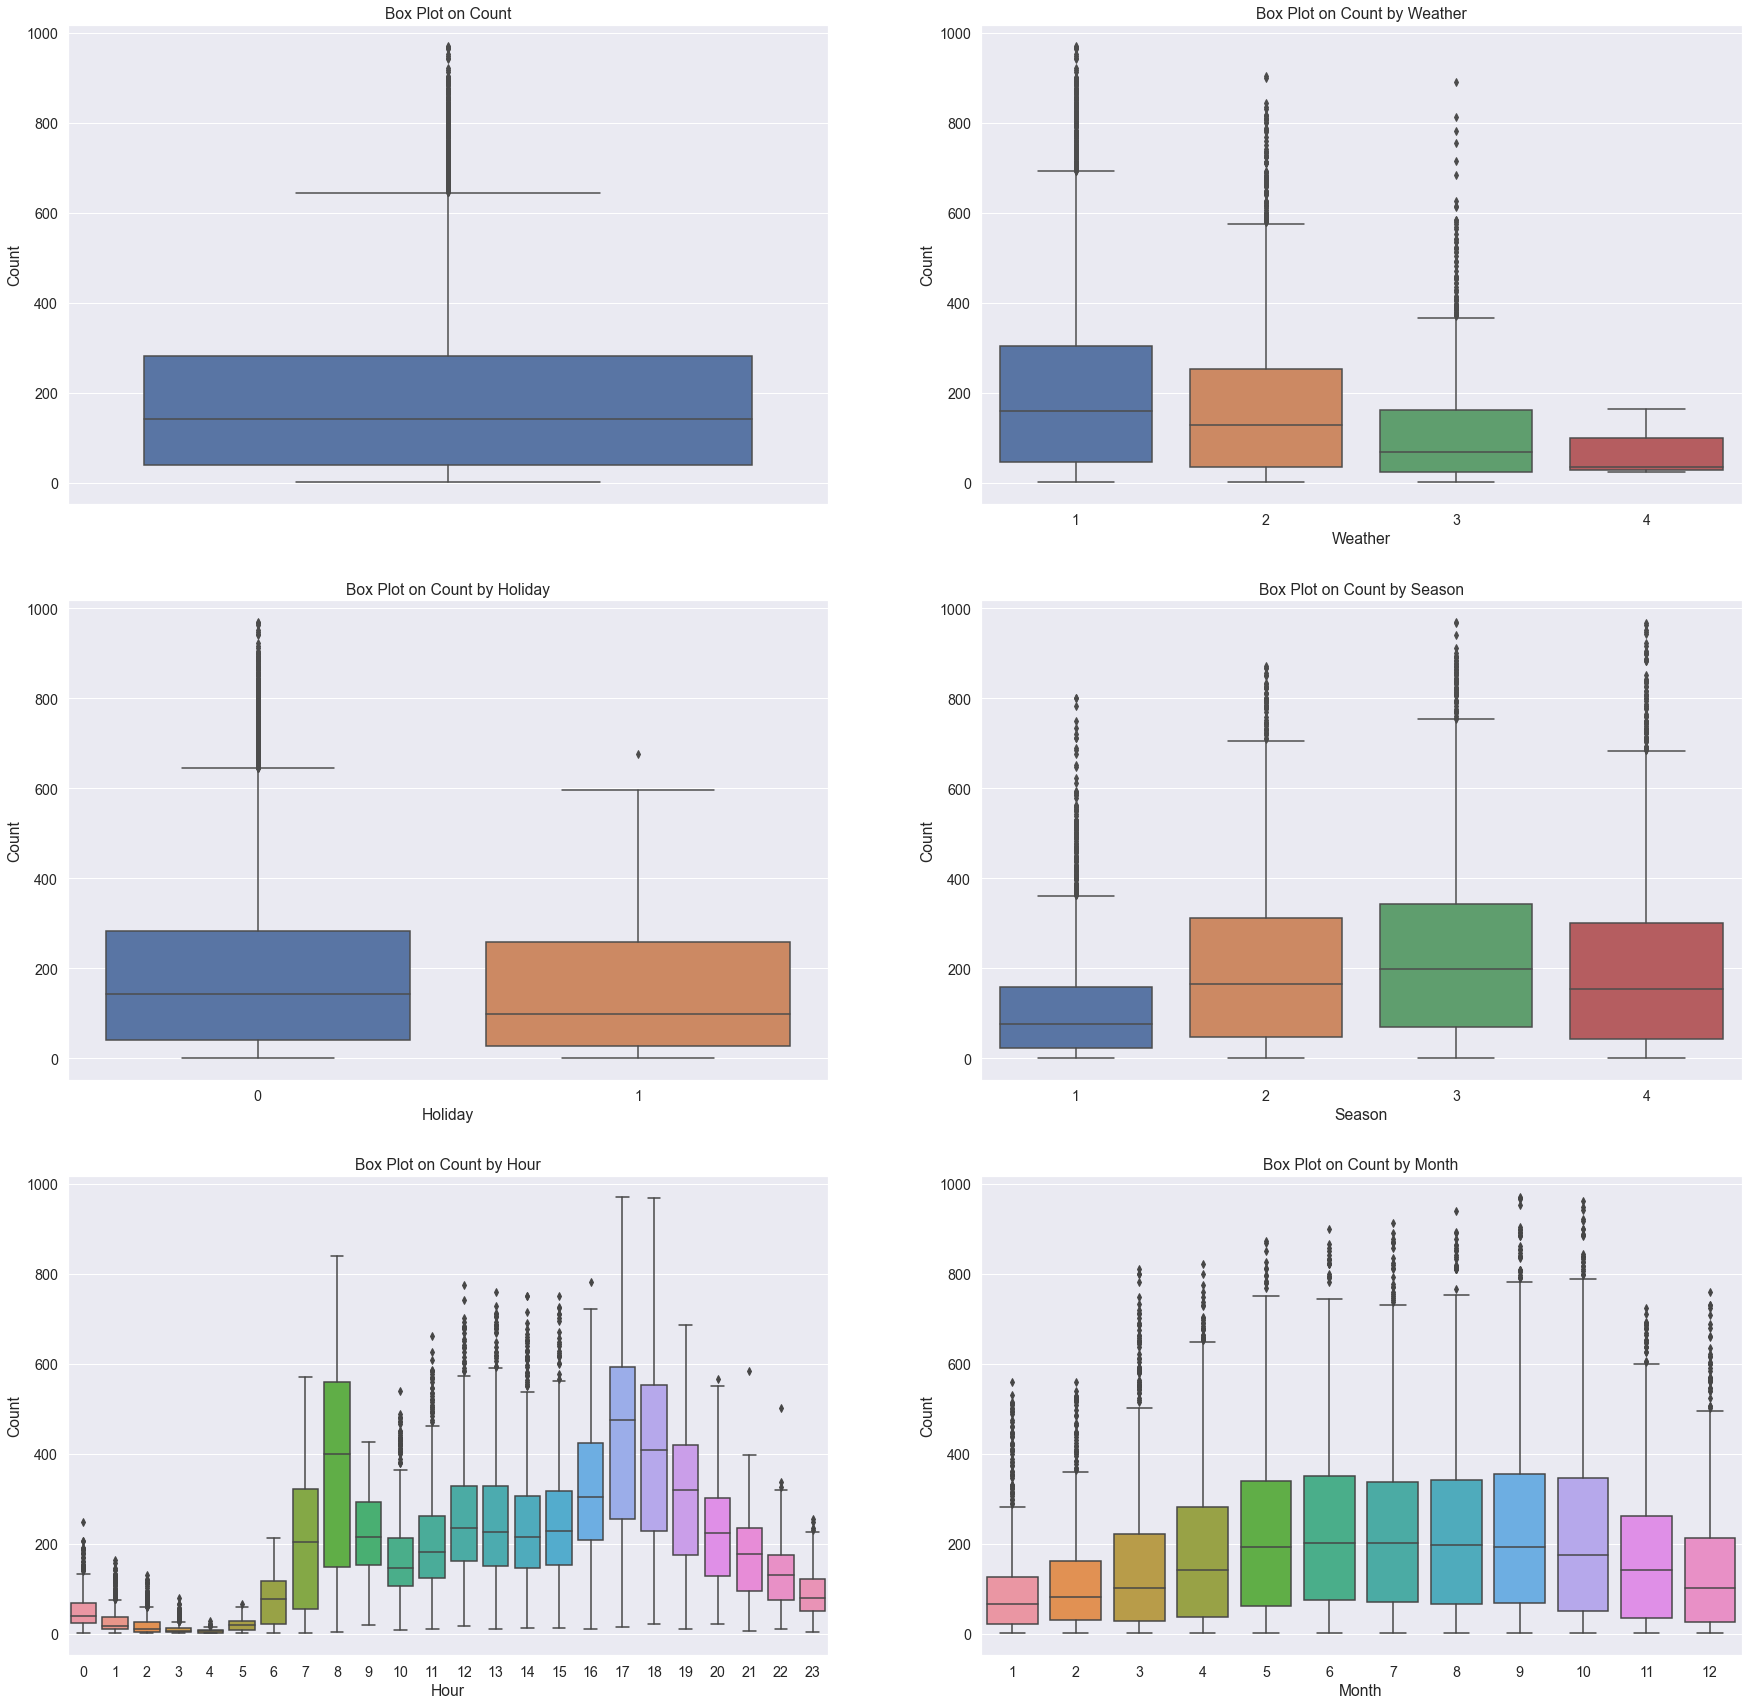

In [989]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(30,30)

sns.boxplot(data=bike_model, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=bike_model, y='count', x='weather', orient='v', ax=axes[0][1])
sns.boxplot(data=bike_model, y='count', x='holiday', orient='v', ax=axes[1][0])
sns.boxplot(data=bike_model, y='count', x='season', orient='v', ax=axes[1][1])
sns.boxplot(data=bike_model, y='count', x='hour', orient='v', ax=axes[2][0])
sns.boxplot(data=bike_model, y='count', x='month', orient='v', ax=axes[2][1])

axes[0][0].set(ylabel='Count', title='Box Plot on Count')
axes[0][1].set(xlabel='Weather', ylabel='Count', title='Box Plot on Count by Weather')
axes[1][0].set(xlabel='Holiday', ylabel='Count', title='Box Plot on Count by Holiday')
axes[1][1].set(xlabel='Season', ylabel='Count', title='Box Plot on Count by Season')
axes[2][0].set(xlabel='Hour', ylabel='Count', title='Box Plot on Count by Hour')
axes[2][1].set(xlabel='Month', ylabel='Count', title='Box Plot on Count by Month')


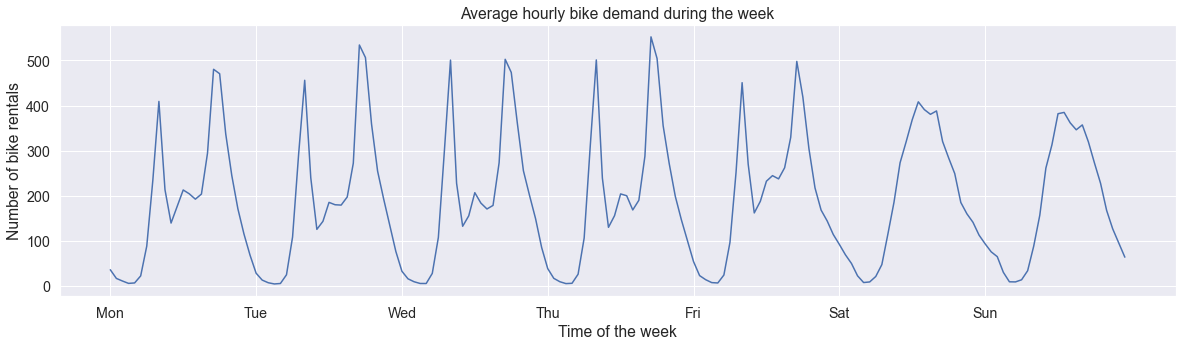

In [990]:
fig, ax = plt.subplots(figsize=(20, 5))
average_week_demand = bike_model.groupby(["d_name", "hour"]).mean()["count"]
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

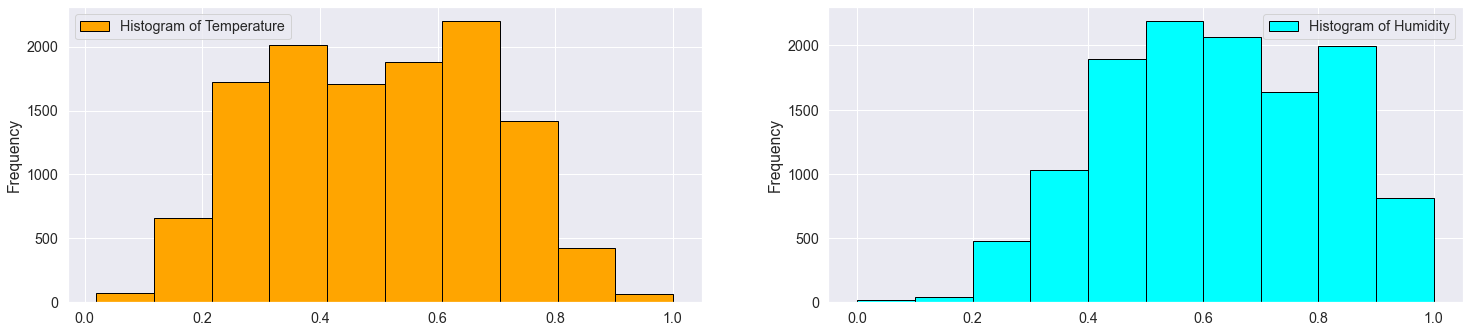

In [991]:
plt.figure(figsize=(25,25))

plt.subplot(421)
bike_model['temperature'].plot.hist(bins=10, color='orange', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
bike_model['humidity'].plot.hist(bins=10, color='cyan', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')

**From the diagrams above, some inferrences can be drawn as follow:**
1. Clear weather corresponds to **Weather 1 has the highest distribution** meanwhile **Weather 4 (Bad Weather)** show the lowest rental users. 
1. Holiday attribute show more users rent bike during working days
1. On season attribute, more users rent bike during summer and fall. Meanwhile, the least rental users recorded during spring.
1. Total users per hour can be divided into three categories: 
    - High : 7-9 and 16-19 hours
    - Average : 10-15 hours
    - Low : 0-6 and 20-24 hours
1. We can clearly identify commute patterns in the mornings and evenings of work days, as well as recreational use of bicycles on weekends, with a more evenly distributed peak demand around the middle of the day
1. High rental demand recorded between May - October
1. `temperature` attributes seem normally distributed and `humidity` seems left skewed distribution


## Data Conditioning

In [992]:
bike_model['weather'].value_counts()

1    8071
2    3119
3     972
4       3
Name: weather, dtype: int64

Weather 4 only have 3 data, whether it's either due to outlier data or bad input and will affect the model. In addition, since **Weather 3 and Weather 4** observed as **rainy/snow** then the two will be **combined** instead of removed

In [993]:
# Replacing Weather 4 into Weather 3
bike_model['weather'] = bike_model['weather'].replace(
    to_replace=[4], 
    value=[3])

In [994]:
bike_model['weather'].value_counts()

1    8071
2    3119
3     975
Name: weather, dtype: int64

Text(0.5, 0, 'Total Users')

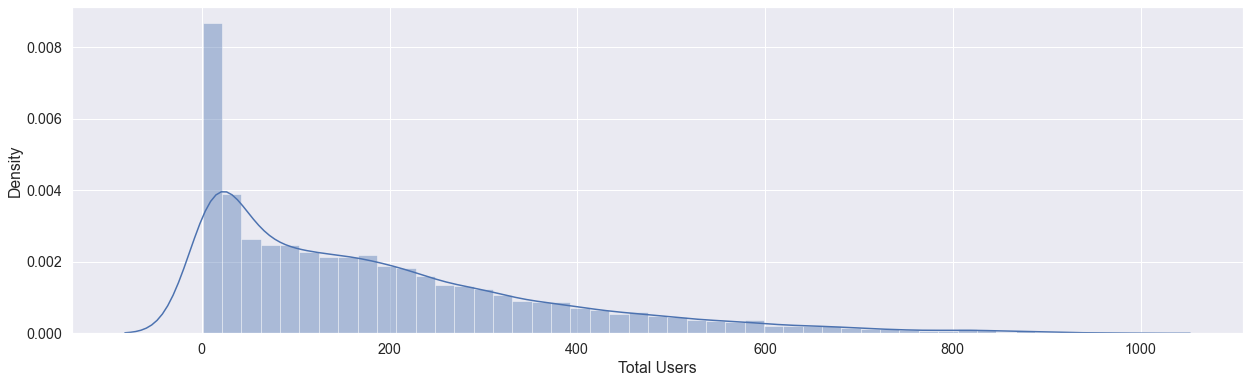

In [995]:
plt.figure(figsize=(21, 6))
sns.distplot(bike_model['count'])
plt.xlabel('Total Users')

The total users histogram display right-skewed distribution

In [996]:
# Checking Outliers
def find_anomalies(bike_model):
    q1 = bike_model.quantile(0.25)
    q3 = bike_model.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower_limit: {lower_limit}')
    print(f'upper_limit: {upper_limit}')    

In [997]:
# Outliers on total users
find_anomalies(bike_model['count'])

IQR: 242.0
lower_limit: -323.0
upper_limit: 645.0


In [998]:
print('Total Users Non-Outliers:', bike_model[(bike_model['count'] <= 645)].count()['count'])
print('Total Users Outliers    :', bike_model[(bike_model['count'] > 645)].count()['count'])

Total Users Non-Outliers: 11827
Total Users Outliers    : 338


<AxesSubplot:xlabel='count', ylabel='Density'>

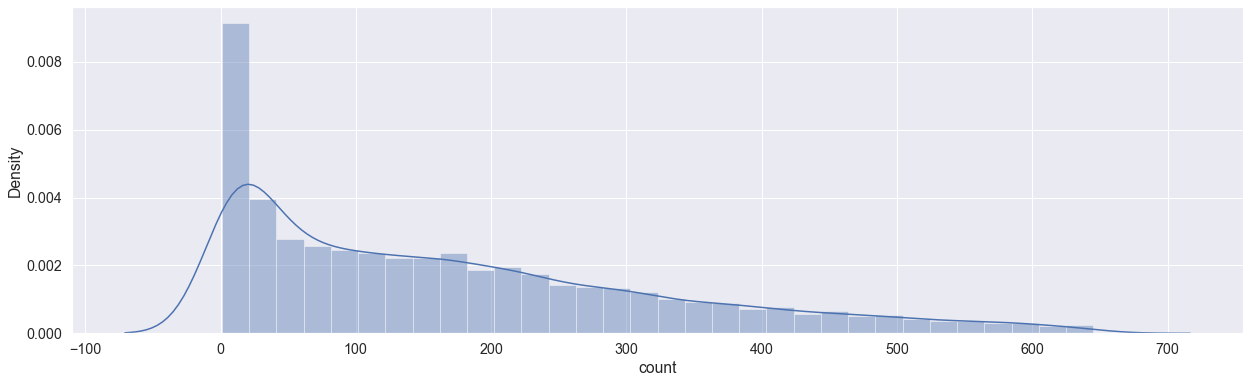

In [999]:
# Data filtering on total users
bike_model_no_outlier = bike_model[(bike_model['count'] <= 645)]

# Data distribution before and after filtering
plt.figure(figsize=(21, 6))
sns.distplot(bike_model_no_outlier['count'])


There are 338 outlier (~3%) from 12165 total data on total users which will be excluded on the modeling step.

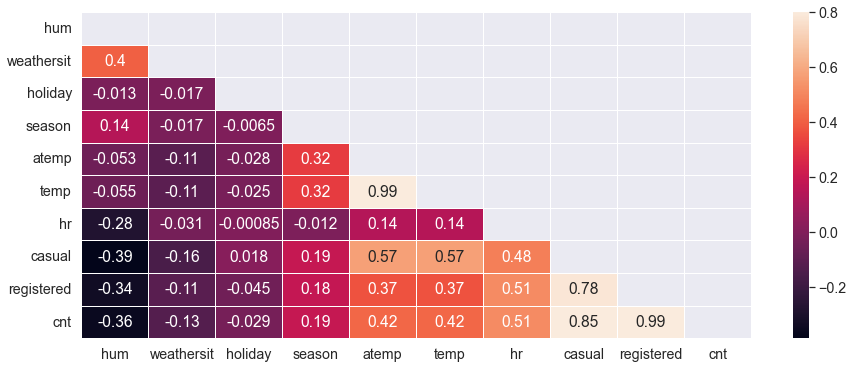

In [1062]:
corrMatt = bike.corr(method='spearman')
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=False, annot=True, ax=ax, linewidths=1);

# **4. DATA PROCESSING**

## Preprocessing

In [1001]:
bike_model.columns

Index(['date', 'humidity', 'weather', 'holiday', 'season', 'temperature',
       'hour', 'casual', 'registered', 'count', 'day', 'month', 'year',
       'd_name'],
      dtype='object')

In [1002]:
# Converting categorical feature into numerical 

one_hot_encoding = OneHotEncoder(drop='first', handle_unknown = 'ignore')
transformer = ColumnTransformer([
    ('One Hot', one_hot_encoding, ['holiday', 'season', 'weather', 'year']),
    ('Binary', ce.BinaryEncoder(), ['hour', 'day', 'month', 'd_name'])
], remainder='passthrough')

In [1003]:
# bike_model_encode = pd.get_dummies(bike_model_no_outlier, columns = ['holiday', 'season', 'weather', 'year'], drop_first=True)


## Data Spliting

In [1004]:
X = bike_model_no_outlier.drop(['count', 'casual', 'registered', 'date'], axis=1)
y = bike_model_no_outlier['count']

In [1005]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=100)

In [1006]:
X_train

,humidity,weather,holiday,season,temperature,hour,day,month,year,d_name
9200,0.65,1,0,3,0.66,21,15,8,2011,1
8472,0.88,1,0,3,0.62,6,26,8,2011,5
10603,0.70,2,0,4,0.24,1,7,12,2012,5
11935,0.44,1,0,1,0.20,1,16,2,2011,3
11445,0.78,2,0,2,0.60,3,19,6,2012,2
...,...,...,...,...,...,...,...,...,...,...
363,0.49,1,0,3,0.80,21,30,7,2011,6
85,0.27,1,0,3,0.90,16,30,7,2011,6
8264,0.65,1,0,2,0.64,0,7,6,2011,2
7125,0.76,1,1,4,0.34,5,8,10,2012,1


## Model Selection

In [1007]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=100)
rf = RandomForestRegressor(random_state=100)
xgb = XGBRegressor(random_state=100)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_RMSE = []
nilai_mean_RMSE = []
nilai_std_RMSE = []

score_MAE = []
nilai_mean_MAE = []
nilai_std_MAE = []

score_MAPE = []
nilai_mean_MAPE = []
nilai_std_MAPE = []

score_R2 = []
nilai_mean_R2 = []
nilai_std_R2 = []


# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=100)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_RMSE.append(model_cv_rmse.round(3))
    nilai_mean_RMSE.append(model_cv_rmse.mean())
    nilai_std_RMSE.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_MAE.append(model_cv_mae.round(3))
    nilai_mean_MAE.append(model_cv_mae.mean())
    nilai_std_MAE.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_MAPE.append(model_cv_mape.round(3))
    nilai_mean_MAPE.append(model_cv_mape.mean())
    nilai_std_MAPE.append(model_cv_mape.std())

    # R2
    model_cv_R2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )

    print(model_cv_R2, i)

    score_R2.append(model_cv_R2.round(3))
    nilai_mean_R2.append(model_cv_R2.mean())
    nilai_std_R2.append(model_cv_R2.std())

[-139.50531737 -168.45696302 -158.55998084 -131.92684356 -143.51952131] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -96.20155217 -109.25066651 -103.99297435  -88.56149246  -98.58623459] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.73351559 -1.5393793  -1.85000018 -1.85094216 -1.83593971] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ 0.18387908 -0.11636693 -0.05808564  0.29710904  0.13532943] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-142.378301   -150.48160684 -142.84692212 -137.48994022 -147.60768289] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor(

In [1008]:
# CV Score
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Score_CV RMSE': score_RMSE,
    'Score_CV MAE': score_MAE,
    'Score_CV MAPE': score_MAPE,
    'Score_CV R2': score_R2
}, )

,Model,Score_CV RMSE,Score_CV MAE,Score_CV MAPE,Score_CV R2
0,Linear Regression,"[-139.505, -168.457, -158.56, -131.927, -143.52]","[-96.202, -109.251, -103.993, -88.561, -98.586]","[-1.734, -1.539, -1.85, -1.851, -1.836]","[0.184, -0.116, -0.058, 0.297, 0.135]"
1,KNN Regressor,"[-142.378, -150.482, -142.847, -137.49, -147.608]","[-98.798, -108.054, -99.942, -96.289, -105.547]","[-2.191, -2.014, -2.313, -2.545, -2.347]","[0.15, 0.109, 0.141, 0.237, 0.085]"
2,DecisionTree Regressor,"[-91.851, -83.438, -88.392, -72.609, -99.44]","[-56.735, -49.563, -52.066, -43.742, -63.347]","[-0.779, -0.65, -0.939, -0.505, -0.936]","[0.646, 0.726, 0.671, 0.787, 0.585]"
3,RandomForest Regressor,"[-72.447, -59.688, -75.031, -57.455, -82.904]","[-46.683, -37.223, -45.784, -35.77, -53.674]","[-0.53, -0.387, -0.495, -0.373, -0.599]","[0.78, 0.86, 0.763, 0.867, 0.711]"
4,XGBoost Regressor,"[-70.517, -66.237, -62.235, -64.32, -64.247]","[-44.776, -42.13, -38.384, -40.244, -41.594]","[-0.447, -0.394, -0.384, -0.402, -0.404]","[0.791, 0.827, 0.837, 0.833, 0.827]"


In [1009]:
# Evaluation from Model
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_RMSE,
    'Std_RMSE': nilai_std_RMSE,
    'Mean_MAE': nilai_mean_MAE,
    'Std_MAE': nilai_std_MAE,
    'Mean_MAPE': nilai_mean_MAPE,
    'Std_MAPE': nilai_std_MAPE,
    'Mean_R2': nilai_mean_R2,
    'Std_R2': nilai_std_R2
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
0,Linear Regression,-148.393725,13.265038,-99.318584,7.020875,-1.761955,0.119577,0.088373,0.153796
1,KNN Regressor,-144.160891,4.499723,-101.726154,4.380824,-2.282005,0.175986,0.144453,0.051505
2,DecisionTree Regressor,-87.146046,8.943278,-53.090831,6.623725,-0.761692,0.167544,0.683100,0.069007
3,RandomForest Regressor,-69.504828,9.594850,-43.826792,6.595133,-0.476730,0.086280,0.796198,0.059262
4,XGBoost Regressor,-65.510946,2.804905,-41.425673,2.116611,-0.406203,0.021666,0.823106,0.016257


The RMSE and MAE numbers differ significantly, with the RMSE being greater since the residuals or errors are squared before being averaged. As a result, RMSE assigns a higher 'weight' to significant error numbers. In other words, because all of the algorithms used create huge error numbers, there is a significant discrepancy between the RMSE and MAE values. For all metrics, RMSE, MAE, MAPE, the smaller number indicate better model. Meanwhile for R2, the higher number indicate better model.

- Based on all of the metrics above, XGBoost is the best model while RandomForest show close model performace to XGBoost compared to other models. 
- The test set will then be predicted using the top benchmark models, XGBoost.

In [1010]:
# Top Benchmark Models
models = {
    'XGB': XGBRegressor(random_state=100)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediction on test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R2': score_r2}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE,R2
XGB,62.292755,45.170614,1.202913,0.83967


## Hyperparameter Tuning

At this point, we will tune the XGBoost model's hyperparameters in the hopes of enhancing model performance.

In [1011]:
# Maximum Depth of Tree
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Number of tree
n_estimators = list(np.arange(1, 201))

# Number of rows per tree (% dari total row train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# subsample ratio of columns when constructing each tree (% of total train set column)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [1012]:
# Benchmark model with hyperparameter tuning
xgb = XGBRegressor(random_state=100, verbosity=0)

# Algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=100)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 100  
)

In [1013]:
# Fitting data training in finding best params
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['holiday',
                                                                                'season',
                                                                                'weather',
                                                                                'year']),
               

In [1014]:
# Tuning result sorted by RMSE, MAE, MAPE, & R2
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error', 'rank_test_r2']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
43,0.962313,0.104061,0.014113,0.002328,0.8,0.021544,61,7,0.17,1,...,0.060608,3,0.837544,0.871093,0.856562,0.872847,0.834185,0.854446,0.016226,1
34,1.283357,0.043181,0.019985,0.007018,0.3,0.001,72,9,0.13,7,...,0.124406,4,0.814551,0.835493,0.828952,0.856820,0.766020,0.820367,0.030393,2
22,0.914220,0.037650,0.016957,0.007044,0.8,0.059948,120,5,0.57,10,...,0.153465,7,0.712581,0.804603,0.794341,0.812245,0.787448,0.782243,0.035851,3
36,0.780658,0.095230,0.017212,0.006571,0.8,10.0,77,7,0.56,8,...,0.268948,10,0.665280,0.795292,0.766634,0.814496,0.763116,0.760964,0.051451,5
24,2.673586,0.038199,0.023448,0.005444,0.6,0.464159,162,7,0.51,5,...,0.125992,6,0.745058,0.763596,0.728134,0.809100,0.760667,0.761311,0.027034,4


In [1015]:
# Checking Best Score & Best Params
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -59.36512005049293
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 61, 'model__max_depth': 7, 'model__learning_rate': 0.17, 'model__gamma': 1, 'model__colsample_bytree': 0.9}


In [1016]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=100)}

# Define model with best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Metrics score RMSE, MAE & MAPE after tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
R2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R2': R2_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,63.8764,44.886791,1.066701,0.831414


In [1017]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE,R2
XGB,62.292755,45.170614,1.202913,0.83967


In [1018]:
# After hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,63.8764,44.886791,1.066701,0.831414


With hyperparameter adjustment, the model's performance slightly improved where RMSE, MAE, and MAPE values decrease.
|    METRICS   |    RSME   |    MAE    |   MAPE   |    R2    |
|--------------|-----------|-----------|----------|----------|
| BEFORE TUNING| 62.292755 | 45.170614 | 1.202913 |	0.83967  |
| AFTER TUNING | 63.8764   | 44.886791 | 1.066701 | 0.831414 |


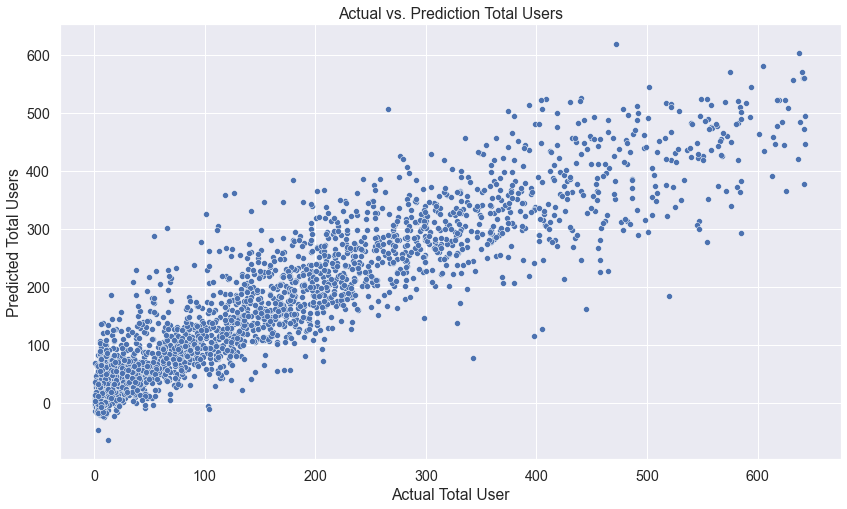

In [1019]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Total Users', 
                                               xlabel='Actual Total User', 
                                               ylabel='Predicted Total Users');

MAPE more than 100% indicates that the mistakes are "much bigger" than the actual values (e.g. actual is 1, you predict 3, so MAPE is 200 percent ). However, because MAPE has several flaws as an error measure, it isn't always the best option. MAPE takes undefined values when there are zero values for the actuals, which can happen in, for example, demand forecasting. Additionally, it takes extreme values when the actuals are very close to zero.

The existence of huge error values significantly affects the RMSE and MAE readings. This is also shown in the graph above, where the actual user is low but expected to be considerably higher (overestimation), and vice versa (underestimation). This model will be re-run using feature selection to see if the performance can be improved.

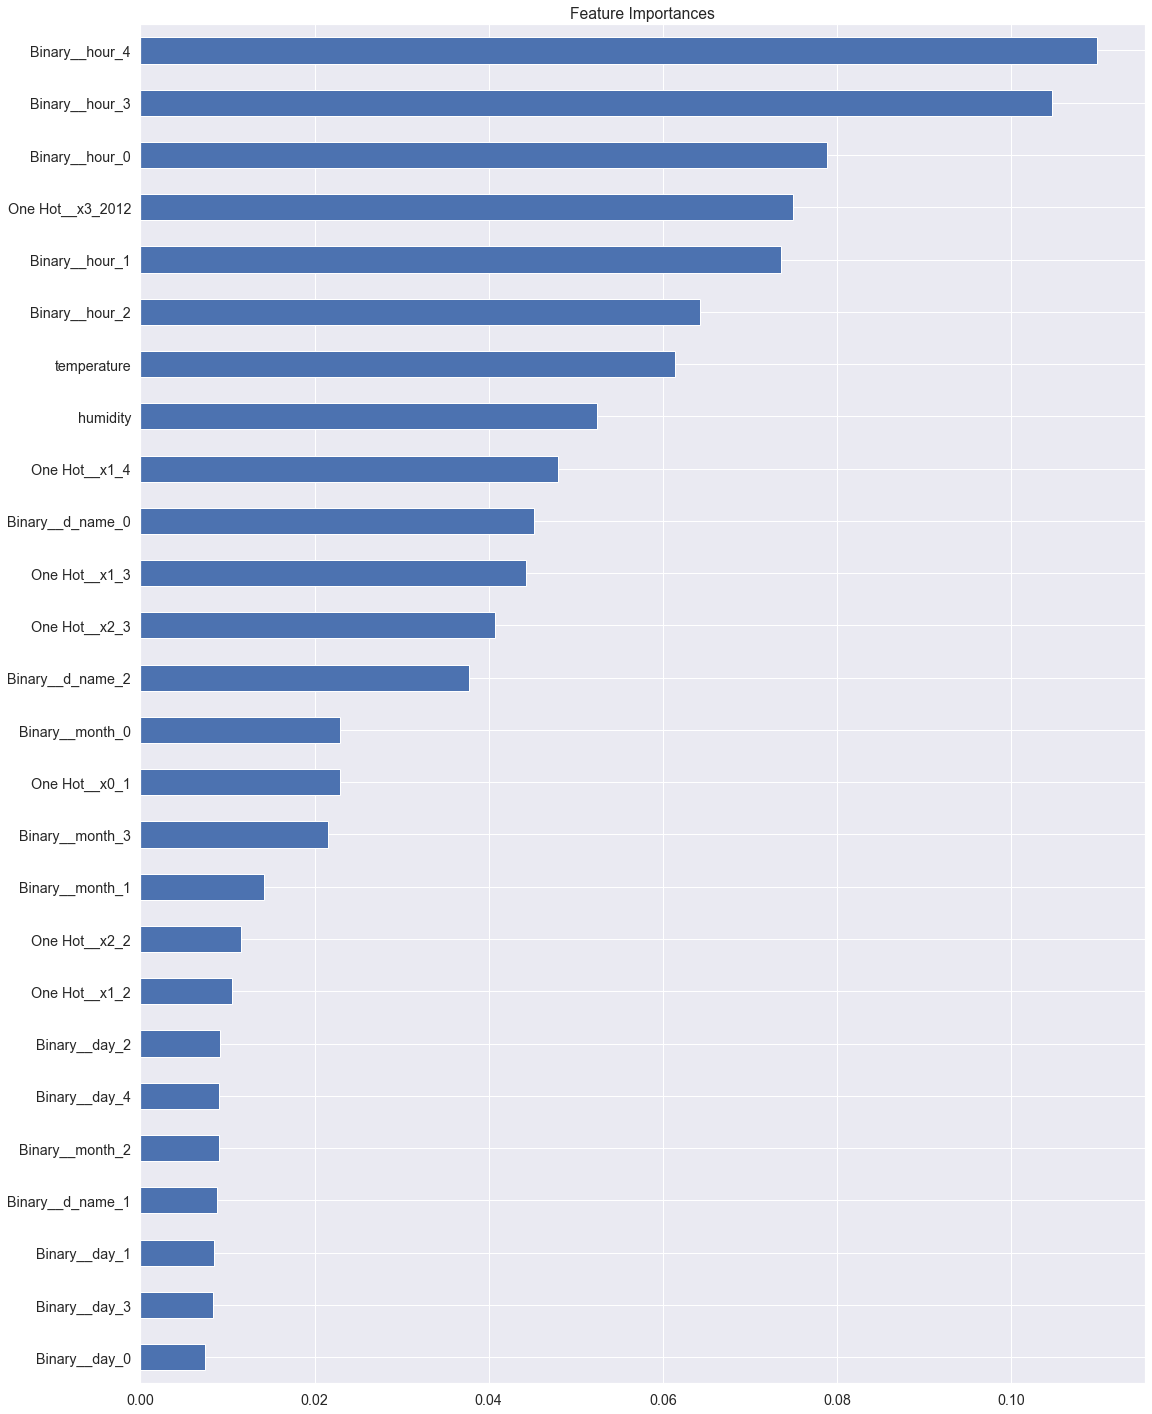

In [1020]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances', figsize=(18,25));

Base on the feature coefficient score, it can be seen that the coefficient score of all Binary_day features are on the bottom tier (< 0.02). Therefore, these features will be dropped.

## Re-run Using Feature Selection

### Encoding 2

In [1021]:
transformer_2 = ColumnTransformer([
    ('One Hot', one_hot_encoding, ['holiday', 'season', 'weather', 'year']),
    ('Binary', ce.BinaryEncoder(), ['hour', 'month', 'd_name'])
], remainder='passthrough')

### Data Spliting 2

In [1022]:
X_select = bike_model_no_outlier.drop(['count', 'day', 'casual', 'registered', 'date'], axis=1)
y_select = bike_model_no_outlier['count']

In [1023]:
X_select_train, X_select_test, y_select_train, y_select_test = train_test_split(
    X_select,
    y_select,
    test_size=0.2,
    random_state=100)

### Modeling 2

In [1024]:
# Benchmark Models 2
models = {
    'XGB': XGBRegressor(random_state=100)
}

score_rmse_2 = []
score_mae_2 = []
score_mape_2 = []
score_r2_2 = []

# Prediction on test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer_2),
        ('model', models[i])
        ])

    model.fit(X_select_train, y_select_train)
    y_pred_2 = model.predict(X_select_test)
    score_rmse_2.append(np.sqrt(mean_squared_error(y_select_test, y_pred_2)))
    score_mae_2.append(mean_absolute_error(y_select_test, y_pred_2))
    score_mape_2.append(mean_absolute_percentage_error(y_select_test, y_pred_2))
    score_r2_2.append(r2_score(y_select_test, y_pred_2))

score_before_tuning_2 = pd.DataFrame({'RMSE': score_rmse_2, 'MAE': score_mae_2, 'MAPE': score_mape_2, 'R2': score_r2_2}, index=models.keys())
score_before_tuning_2

,RMSE,MAE,MAPE,R2
XGB,66.207004,47.45046,1.297088,0.818888


### Hyperparameter Tuning 2

In [1025]:
# Maximum Depth of Tree
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Number of tree
n_estimators = list(np.arange(1, 201))

# Number of rows per tree (% dari total row train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# subsample ratio of columns when constructing each tree (% of total train set column)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [1026]:
# Benchmark model with hyperparameter tuning 2
xgb = XGBRegressor(random_state=100, verbosity=0)

# Algorithm chains
estimator_xgb_2 = Pipeline([
        ('preprocessing', transformer_2),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=100)

# Hyperparameter tuning
random_xgb_2 = RandomizedSearchCV(
    estimator_xgb_2, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 100  
)

In [1027]:
# Fitting data training in finding best params
random_xgb_2.fit(X_select_train, y_select_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['holiday',
                                                                                'season',
                                                                                'weather',
                                                                                'year']),
               

In [1028]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=100)}

# Define model with best estimator
xgb_tuning_2 = random_xgb_2.best_estimator_

# Fitting model
xgb_tuning_2.fit(X_select_train, y_select_train)

# Predict test set
y_pred_xgb_tuning_2 = xgb_tuning_2.predict(X_select_test)

# Metrics score RMSE, MAE & MAPE after tuning
rmse_xgb_tuning_2 = np.sqrt(mean_squared_error(y_select_test, y_pred_xgb_tuning_2))
mae_xgb_tuning_2 = mean_absolute_error(y_select_test, y_pred_xgb_tuning_2)
mape_xgb_tuning_2 = mean_absolute_percentage_error(y_select_test, y_pred_xgb_tuning_2)
R2_xgb_tuning_2 = r2_score(y_select_test, y_pred_xgb_tuning_2)

score_after_tuning_2 = pd.DataFrame({'RMSE': rmse_xgb_tuning_2, 'MAE': mae_xgb_tuning_2, 'MAPE': mape_xgb_tuning_2, 'R2': R2_xgb_tuning_2}, index=model.keys())
score_after_tuning_2

,RMSE,MAE,MAPE,R2
XGB,63.437227,43.918059,1.044236,0.833724


In [1029]:
# Before hyperparameter tuning 2
pd.DataFrame(score_before_tuning_2.loc['XGB']).T

,RMSE,MAE,MAPE,R2
XGB,66.207004,47.45046,1.297088,0.818888


In [1030]:
# After hyperparameter tuning 2
score_after_tuning_2

,RMSE,MAE,MAPE,R2
XGB,63.437227,43.918059,1.044236,0.833724


In [1040]:
print(score_before_tuning)
print(score_after_tuning)
print(score_before_tuning_2)
print(score_after_tuning_2)

          RMSE        MAE      MAPE       R2
XGB  62.292755  45.170614  1.202913  0.83967
        RMSE        MAE      MAPE        R2
XGB  63.8764  44.886791  1.066701  0.831414
          RMSE       MAE      MAPE        R2
XGB  66.207004  47.45046  1.297088  0.818888
          RMSE        MAE      MAPE        R2
XGB  63.437227  43.918059  1.044236  0.833724


After implementing feature selection the model performance slightly decrease. However, after deploying hyperparameter on feature selection model, then the performance increase even better than the initial model. It can be found as follows:

|    METRICS   |    RSME   |    MAE    |   MAPE   |    R2    |
|--------------|-----------|-----------|----------|----------|
|    MODEL 1   |
| BEFORE TUNING| 62.292755 | 45.170614 | 1.202913 |	0.83967  |
| AFTER TUNING | 63.8764   | 44.886791 | 1.066701 | 0.831414 |
|    MODEL 2   |
| BEFORE TUNING| 66.207004 | 47.45046  | 1.297088 |	0.818888 |
| AFTER TUNING | 63.437227 | 43.918059 | 1.044236 | 0.833724 |


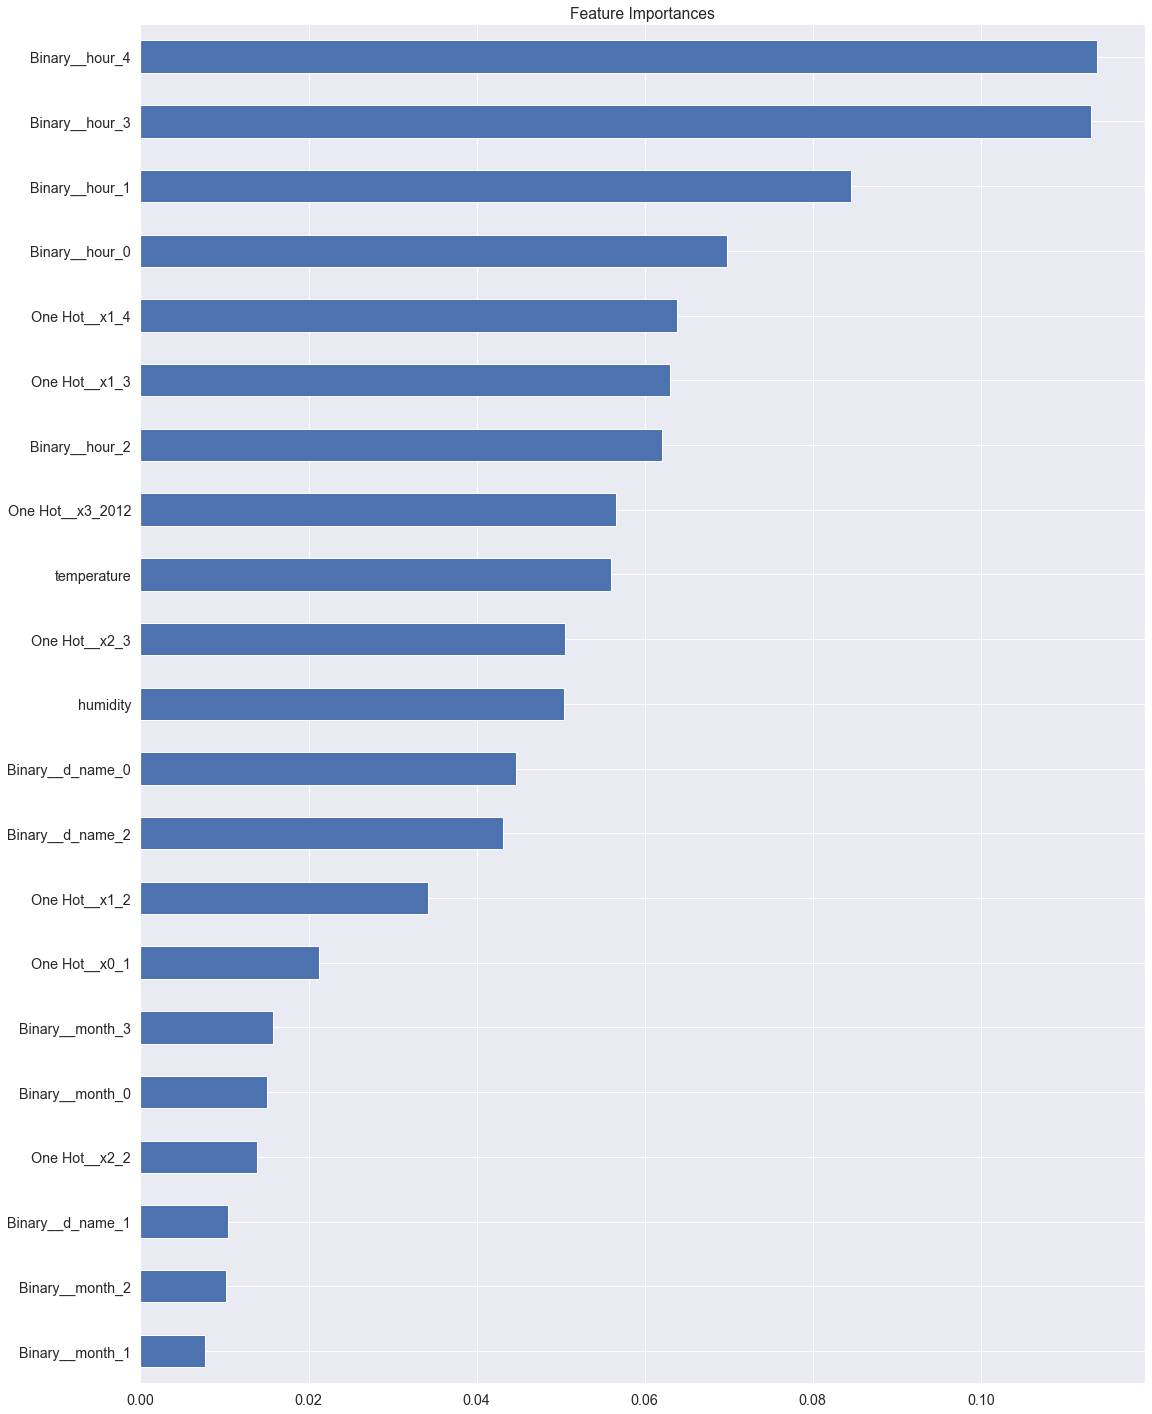

In [1031]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning_2['model'].feature_importances_, transformer_2.get_feature_names()).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances', figsize=(18,25));

---
# **5. CONCLUSION**
---
According to the modeling, the `binary_hour_4` and `binary_hour_3` attributes had the most influence on `count`. This information can be used by operational department to assess the appropriate time for periodical maintenance on the bike that will not significantly affect the bikes availability

The evaluation metrics used in the model are RMSE, MAE & MAPE values. I prefer to use MAE to interpret this model since RMSE is more sensitive to outliers. On the other hand, MAE returns values that are more interpretable as it is simply the average of all errors.

It can be concluded from the MAE value generated by the model after hyperparameter tuning, which is 42.4, that when our model is used to estimate the bike rental demand in the range of values as trained on the model (maximum users count is 970), the average users prediction will miss by approximately 42 people from the demand it should have. However, it is probable that the forecast will miss even more because the model's bias remains fairly significant when viewed from the visualization of the actual and predicted prices. This model's bias can be caused by lack of data samples or require more features.


---
# **6. RECOMMENDATION**
---
Some recommendation that can be used to improved the model, such as:

1. Adding more feature may help to improve this model, such as pollution level and traffic.

1. Reviewing the parameter used in modeling, such as using `TimeSeriesSplit` for cross validation method.

1. Dig more on outlier handling that may caused the bias in the model.

1. Deploy more feature engineering process, such as data binning, polynomial, PCA, etc.



___

# **SAVE MODEL**

In [1032]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer_2), ('model', XGBRegressor())])
# estimator.fit(X_select_train, y_select_train)

# pickle.dump(estimator, open('Model_BikeSharing_XGB.sav', 'wb'))

In [1033]:
# Load model
filename = 'Model_BikeSharing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [1034]:
bike_model_no_outlier.columns

Index(['date', 'humidity', 'weather', 'holiday', 'season', 'temperature',
       'hour', 'casual', 'registered', 'count', 'day', 'month', 'year',
       'd_name'],
      dtype='object')

In [1053]:
bike_predict = pd.DataFrame({
    'humidity': ['0.3'], 
    'weather': ['1'], 
    'holiday': ['0'], 
    'season': ['1'], 
    'temperature': ['0.8'],
    'hour': ['20'],
    'day': ['15'], 
    'month': ['12'], 
    'year': ['2013'],
    'd_name': ['5']
})

In [1054]:
bike_predict

,humidity,weather,holiday,season,temperature,hour,day,month,year,d_name
0,0.3,1,0,1,0.8,20,15,12,2013,5


In [1055]:
loaded_model.predict(bike_predict)

array([147.24976], dtype=float32)